In [5]:
#Import pandas, matplotlib.pyplot, and seaborn in the correct lines below
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statistics
import numpy as np


In [6]:
# the supplied CSV data file is the raw_data directory
survey_data = pd.read_csv('2020 NSCH_Topical_CAHMI_DRC_Dataset.csv')

In [7]:
survey_data.head()

,FIPSST,STRATUM,HHID,FORMTYPE,TOTKIDS_R,TENURE,HHLANGUAGE,SC_AGE_YEARS,SC_SEX,K2Q35A_1_YEARS,...,npm15AdIns_20,nom14TthDec_20,nom17_1CSHCN_20,nom17_2sysCSHCN_20,nom17_3ASD_20,nom17_4ADHD_20,nom18MHlth_20,nom19ChHSt_20,nom20obese_20,nom25ForgoneHC_20
0,17,1,20000003,1,2,1,1,3,1,95,...,1,2,2,95,3,3,95,1,90,2
1,29,2,20000004,3,1,1,1,14,2,95,...,1,2,1,1,3,3,1,1,2,2
2,47,1,20000005,1,1,1,1,1,2,95,...,1,2,2,95,95,95,95,1,90,2
3,28,1,20000014,3,2,1,1,15,2,95,...,2,1,2,95,3,3,95,3,2,2
4,55,1,20000015,3,2,2,1,16,2,95,...,2,2,1,2,3,3,95,1,3,2


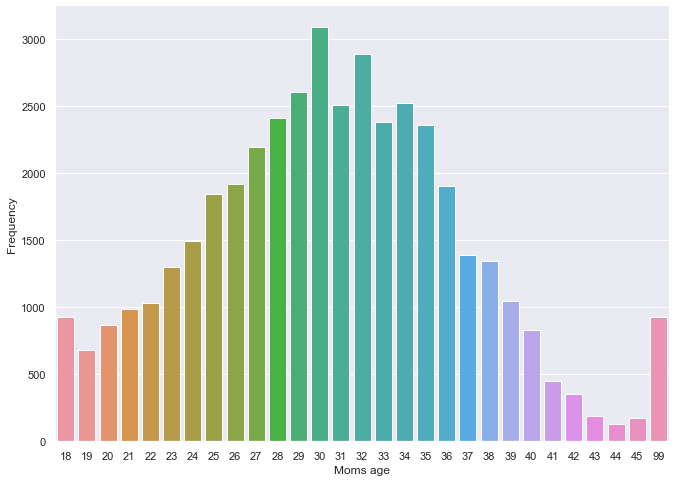

In [133]:
sns.set(rc = {'figure.figsize':(11,8)})
sns.countplot(data=survey_data,
              x='MOMAGE')
plt.xlabel('Moms age')
plt.ylabel('Frequency')
plt.title('')
sns.despine()
plt.show()

Moms age is between 18-99. The 99 value is suspicious and might be coded for missing values. So, it makes sense to remove all the rows with mom age of 99. 


In [134]:
survey_data = survey_data[survey_data["MOMAGE"] !=99]

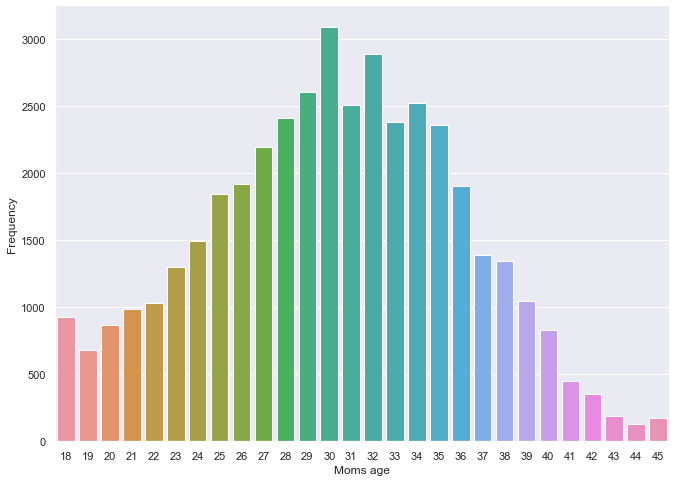

In [135]:
sns.set(rc = {'figure.figsize':(11,8)})
sns.countplot(data=survey_data,
              x='MOMAGE')
plt.xlabel('Moms age')
plt.ylabel('Frequency')
plt.title('')
sns.despine()
plt.show()

It seems that there are some moms wth age under 20 years old and we are interested to see if there is any pattern in their state of residencey which is presented in the "FIPS" column. 
   

     FIPS code     name
   -----------   -------
       01        ALABAMA
       02        ALASKA
       04        ARIZONA
       05        ARKANSAS
       06        CALIFORNIA
       08        COLORADO
       09        CONNECTICUT
       10        DELAWARE
       11        DISTRICT OF COLUMBIA
       12        FLORIDA
       13        GEORGIA
       15        HAWAII
       16        IDAHO
       17        ILLINOIS
       18        INDIANA
       19        IOWA
       20        KANSAS
       21        KENTUCKY
       22        LOUISIANA
       23        MAINE
       24        MARYLAND
       25        MASSACHUSETTS
       26        MICHIGAN
       27        MINNESOTA
       28        MISSISSIPPI
       29        MISSOURI
       30        MONTANA
       31        NEBRASKA
       32        NEVADA
       33        NEW HAMPSHIRE
       34        NEW JERSEY
       35        NEW MEXICO
       36        NEW YORK
       37        NORTH CAROLINA
       38        NORTH DAKOTA
       39        OHIO
       40        OKLAHOMA
       41        OREGON
       42        PENNSYLVANIA
       44        RHODE ISLAND
       45        SOUTH CAROLINA
       46        SOUTH DAKOTA
       47        TENNESSEE
       48        TEXAS
       49        UTAH
       50        VERMONT
       51        VIRGINIA
       53        WASHINGTON
       54        WEST VIRGINIA
       55        WISCONSIN
       56        WYOMING

In [136]:
moms_under20= survey_data[survey_data["MOMAGE"]<20]

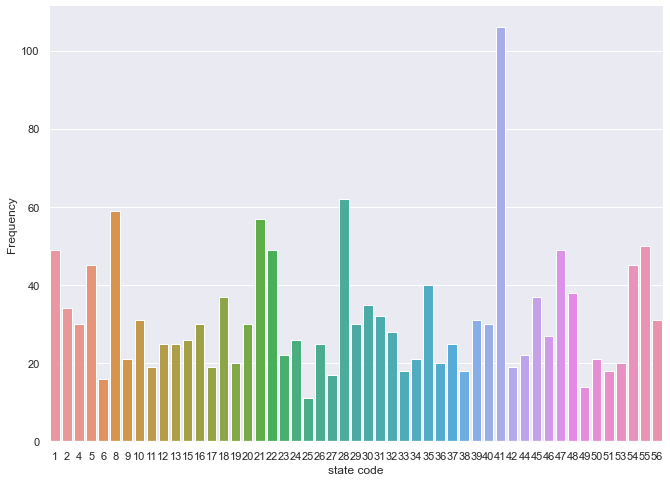

In [138]:
sns.set(rc = {'figure.figsize':(11,8)})
sns.countplot(data=moms_under20,
              x='FIPSST')
plt.xlabel('state code')
plt.ylabel('Frequency')
plt.title('')
sns.despine()
plt.show()

It seems that state 41(oregon) has the most mom under age of 20.We are now interested to see if there is any relation between mom ages and kids with ADHD/ADD('ADHD_20").

VALUE LABELS ADHD_20
1 "Does not have condition"
2 "Ever told, but does not currently have condition"
3 "Currently has condition"
99 "Missing"
95"Children age 0-2 years".

In [147]:
survey_data['ADHD_20']

0         1
1         1
2        95
3         1
4         1
         ..
42772     3
42773     1
42774     3
42775     1
42776     3
Name: ADHD_20, Length: 41851, dtype: int64

In [8]:
dfx = survey_data.iloc[:,:20]

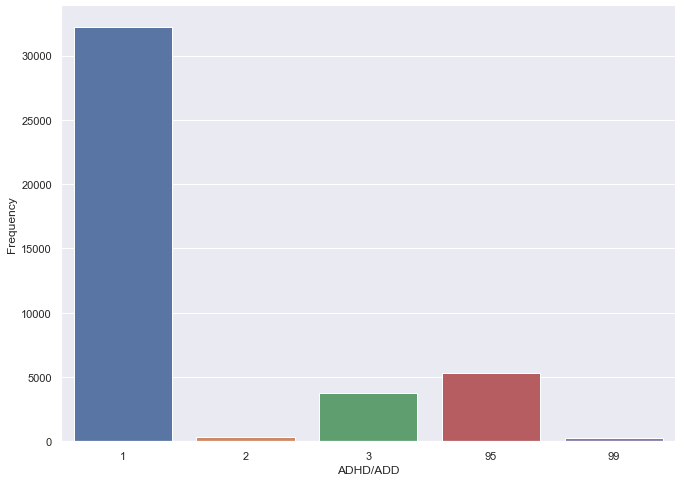

In [148]:
sns.set(rc = {'figure.figsize':(11,8)})
sns.countplot(data=survey_data,
              x='ADHD_20')
plt.xlabel('ADHD/ADD')
plt.ylabel('Frequency')
plt.title('')
sns.despine()
plt.show()

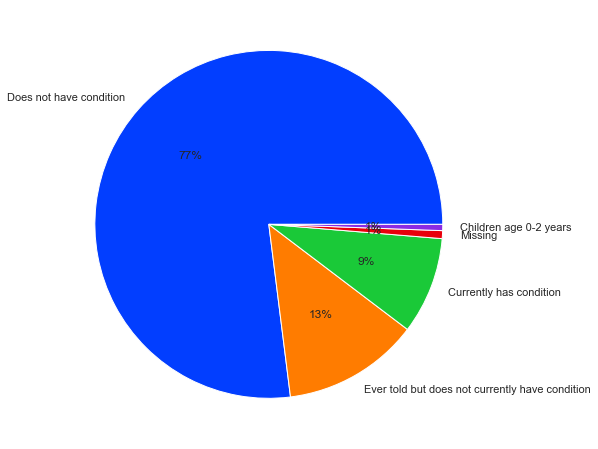

In [170]:
#define data
#data = [15, 25, 25, 30, 5]
#labels = ['Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5']

#define Seaborn color palette to use
#colors = sns.color_palette('bright')[0:5]


#create pie chart
#plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
#plt.show()

#sns.set(rc = {'figure.figsize':(11,8)})
#sns.(data=survey_data,
              #x='ADHD_20')
#plt.xlabel('ADHD/ADD')
#plt.ylabel('Frequency')
#plt.title('')
#sns.despine()
#plt.show()
data = list(survey_data["ADHD_20"].value_counts()/len(survey_data["ADHD_20"])*100)
labels= ["Does not have condition","Ever told but does not currently have condition", "Currently has condition","Missing",
"Children age 0-2 years"]

colors = sns.color_palette('bright')[0:5]


#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

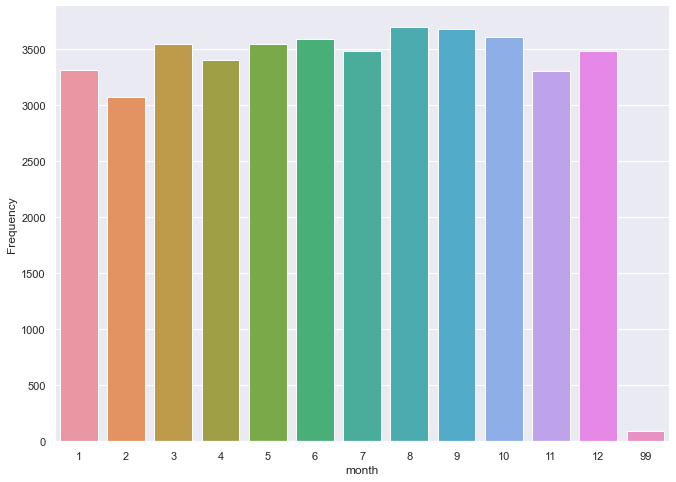

In [164]:
sns.set(rc = {'figure.figsize':(11,8)})
sns.countplot(data=survey_data,
              x='BIRTH_MO')
plt.xlabel('month')
plt.ylabel('Frequency')
plt.title('')
sns.despine()
plt.show()

Kids who were born in month of october and November have lower rate of ADHD.

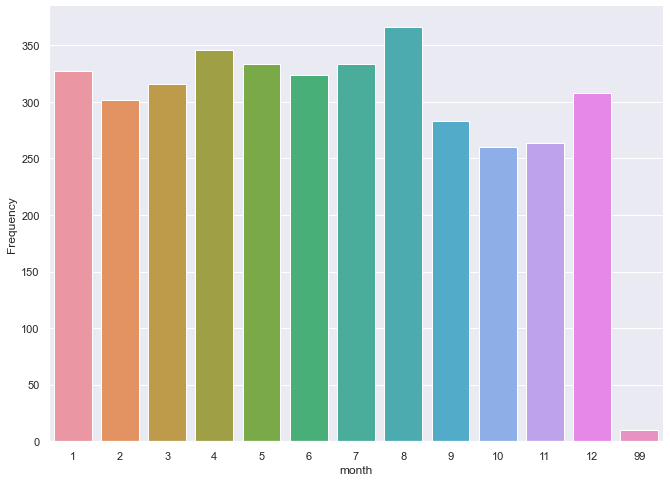

In [162]:
with_ADHD=survey_data[survey_data["ADHD_20"]==3]
sns.set(rc = {'figure.figsize':(11,8)})
sns.countplot(data=with_ADHD,
              x='BIRTH_MO')
plt.xlabel('month')
plt.ylabel('Frequency')
plt.title('')
sns.despine()
plt.show()

In [9]:
dfy= survey_data.iloc[:,113:117]

In [10]:
tot = pd.concat([dfx, dfy], axis=1)
tot.head()

,FIPSST,STRATUM,HHID,FORMTYPE,TOTKIDS_R,TENURE,HHLANGUAGE,SC_AGE_YEARS,SC_SEX,K2Q35A_1_YEARS,...,K6Q42R_NEVER,K6Q43R_NEVER,K6Q13A,K6Q13B,K6Q14A,K6Q14B,K2Q31A,K2Q31B,K2Q31D,ADDTREAT
0,17,1,20000003,1,2,1,1,3,1,95,...,1,2,95,95,95,95,2,95,95,95
1,29,2,20000004,3,1,1,1,14,2,95,...,90,90,90,90,90,90,2,95,95,95
2,47,1,20000005,1,1,1,1,1,2,95,...,2,2,95,95,95,95,2,95,95,95
3,28,1,20000014,3,2,1,1,15,2,95,...,90,90,90,90,90,90,2,95,95,95
4,55,1,20000015,3,2,2,1,16,2,95,...,90,90,90,90,90,90,2,95,95,95


In [11]:
missing = pd.concat([tot.isnull().sum(), 100 * tot.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count',ascending=False)

,count,%
FIPSST,0,0.0
STRATUM,0,0.0
K2Q31D,0,0.0
K2Q31B,0,0.0
K2Q31A,0,0.0
K6Q14B,0,0.0
K6Q14A,0,0.0
K6Q13B,0,0.0
K6Q13A,0,0.0
K6Q43R_NEVER,0,0.0


In [12]:
tot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42777 entries, 0 to 42776
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   FIPSST          42777 non-null  int64
 1   STRATUM         42777 non-null  int64
 2   HHID            42777 non-null  int64
 3   FORMTYPE        42777 non-null  int64
 4   TOTKIDS_R       42777 non-null  int64
 5   TENURE          42777 non-null  int64
 6   HHLANGUAGE      42777 non-null  int64
 7   SC_AGE_YEARS    42777 non-null  int64
 8   SC_SEX          42777 non-null  int64
 9   K2Q35A_1_YEARS  42777 non-null  int64
 10  BIRTH_MO        42777 non-null  int64
 11  BIRTH_YR        42777 non-null  int64
 12  MOMAGE          42777 non-null  int64
 13  K6Q41R_STILL    42777 non-null  int64
 14  K6Q42R_NEVER    42777 non-null  int64
 15  K6Q43R_NEVER    42777 non-null  int64
 16  K6Q13A          42777 non-null  int64
 17  K6Q13B          42777 non-null  int64
 18  K6Q14A          42777 non-

<AxesSubplot:>

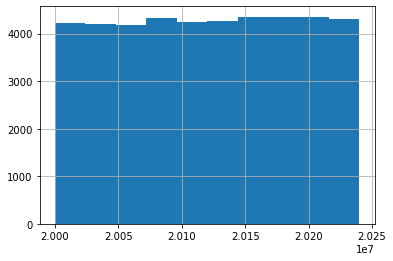

In [13]:
tot["HHID"].hist()

In [14]:
#TENURE (“Is this house, apartment, or mobile home”)
tot['TENURE'].value_counts()

1    30205
3     7823
2     4349
4      400
Name: TENURE, dtype: int64

In [15]:
#1 "Hispanic children, non-English PHH language"
#2 "Hispanic children, English PHH language"
#3 "Non-Hispanic child"
#99 "Missing to any".
tot['HHLANGUAGE'].value_counts()

1     39480
2      1605
3      1538
99      154
Name: HHLANGUAGE, dtype: int64

In [16]:
#imputing the 99 values by mode of the column
tot[tot['HHLANGUAGE']==99]= statistics.mode(tot['HHLANGUAGE'])

In [17]:
tot['HHLANGUAGE'].value_counts()

1    39634
2     1605
3     1538
Name: HHLANGUAGE, dtype: int64

In [18]:
tot["SC_AGE_YEARS"].value_counts()

17    3286
16    3285
15    3003
14    2732
13    2683
12    2474
11    2408
2     2329
10    2290
5     2272
3     2241
4     2235
9     2146
7     2126
8     2091
6     1993
1     1793
0     1390
Name: SC_AGE_YEARS, dtype: int64

In [19]:
#Autism ASD - First Told Age in Years
tot["K2Q35A_1_YEARS"].value_counts()

95    41194
99      273
2       246
3       231
1       192
4       135
5       118
8        67
7        66
6        66
9        51
10       35
12       29
13       28
11       24
15       22
Name: K2Q35A_1_YEARS, dtype: int64

In [20]:
statistics.mode(tot["K2Q35A_1_YEARS"])


95

In [21]:
#Droping the rows with value of 99
tot = tot[tot["K2Q35A_1_YEARS"] !=99]

In [22]:
#Birth Month
tot["BIRTH_MO"].value_counts()

8     3723
9     3708
10    3633
6     3630
3     3579
5     3577
1     3520
7     3515
12    3514
4     3424
11    3322
2     3101
99     258
Name: BIRTH_MO, dtype: int64

In [23]:
statistics.median(tot["BIRTH_MO"])

7.0

In [24]:
#imputing missing values by median
tot[tot['BIRTH_MO']==99]= statistics.median(tot['BIRTH_MO'])

In [25]:
#Birth Year
tot["BIRTH_YR"].value_counts()

2003    3170
2004    3080
2005    2787
2006    2653
2007    2574
2008    2368
2018    2285
2009    2262
2015    2259
2016    2249
2010    2205
2017    2153
2011    2148
2014    2079
2013    2065
2012    2036
2019    1556
2002    1063
2020     947
7        258
1        154
99       153
Name: BIRTH_YR, dtype: int64

In [26]:
tot = tot[(tot["BIRTH_YR"] !=99) & (tot["BIRTH_YR"] !=7) &(tot["BIRTH_YR"] !=1)]

In [29]:
tot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41231 entries, 0 to 42776
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   FIPSST          41231 non-null  int64
 1   STRATUM         41231 non-null  int64
 2   HHID            41231 non-null  int64
 3   FORMTYPE        41231 non-null  int64
 4   TOTKIDS_R       41231 non-null  int64
 5   TENURE          41231 non-null  int64
 6   HHLANGUAGE      41231 non-null  int64
 7   SC_AGE_YEARS    41231 non-null  int64
 8   SC_SEX          41231 non-null  int64
 9   K2Q35A_1_YEARS  41231 non-null  int64
 10  BIRTH_MO        41231 non-null  int64
 11  BIRTH_YR        41231 non-null  int64
 12  MOMAGE          41231 non-null  int64
 13  K6Q41R_STILL    41231 non-null  int64
 14  K6Q42R_NEVER    41231 non-null  int64
 15  K6Q43R_NEVER    41231 non-null  int64
 16  K6Q13A          41231 non-null  int64
 17  K6Q13B          41231 non-null  int64
 18  K6Q14A          41231 non-

In [30]:
#Stopped Breastfeeding - Still Breastfeeding
#1 "Less than 6 months"
#2 "6 months or longer, or still breastfeeding"
#95 "Never breastfeed"
#99 "Missing"
#90 "Children age 6-17 years"
tot["K6Q41R_STILL"].value_counts()

90    29408
2      8613
95     1655
1      1264
99      291
Name: K6Q41R_STILL, dtype: int64

In [31]:
statistics.median(tot["K6Q41R_STILL"])

90

In [32]:
#Computing missing data by median/mode
tot[tot['K6Q41R_STILL']==99]= statistics.median(tot["K6Q41R_STILL"])

In [33]:
#90 "Children age 6-17 years"
tot["K6Q41R_STILL"].value_counts()

90    29699
2      8613
95     1655
1      1264
Name: K6Q41R_STILL, dtype: int64

In [34]:
#Fed formula earlier than 6 months, after 6 months or never
#1 "Earlier than 6 months"
#2 "6 months or after or never fed formula"
#99 "Missing"
#90 "Children age 6-17 years".
tot["K6Q42R_NEVER"].value_counts()

90    29699
2      8341
1      3157
99       34
Name: K6Q42R_NEVER, dtype: int64

In [35]:
statistics.median(tot["K6Q42R_NEVER"])

90

In [36]:
tot[tot['K6Q42R_NEVER']==99]= statistics.median(tot["K6Q42R_NEVER"])

In [37]:
#Fed other food earlier than 6 months, after 6 months or never
#1 "Earlier than 6 months"
#2 "6 months or after or never fed other food"
#99 "Missing"
#90 "Children age 6-17 years".
tot["K6Q43R_NEVER"].value_counts()

90    29733
2     10593
1       847
99       58
Name: K6Q43R_NEVER, dtype: int64

In [38]:
statistics.median(tot["K6Q43R_NEVER"])

90

In [39]:
tot[tot['K6Q43R_NEVER']==99]= statistics.median(tot["K6Q43R_NEVER"])

In [40]:
tot["K6Q43R_NEVER"].value_counts()

90    29791
2     10593
1       847
Name: K6Q43R_NEVER, dtype: int64

In [41]:
#Questionnaire Covers Talks or Speech Sounds Concerns
tot["K6Q13A"].value_counts()

90    29791
95    10555
1       825
2        40
99       20
Name: K6Q13A, dtype: int64

#Parent respondents for all children between 9 months and 5 years old were asked the following question: 
"During the past 12 months, did a doctor or other health care provider have you or another caregiver fill out a questionnaire about specific concerns or observations you may have about this child’s development, communication, or social behaviors?" (K6Q12).
If the response to K6Q12 was “Yes”, parents were asked if the questionnaire covered language or social development (K6Q13 and K6Q13A, respectively, for ages 9-23 months, and K6Q14A and K6Q14B for ages 2-5 years). The measure is considered missing if both types of contents are missing

In [42]:
#1 "Yes to both types or Yes to one and Missing to another type of content"
#2 "No to at least one type of content"
#99 "Missing to both types of content"
#95 "Children age 0-8 months or 2-5 years"
#90 "Children age 6-17 years".

tot["K6Q13A"].value_counts()

90    29791
95    10555
1       825
2        40
99       20
Name: K6Q13A, dtype: int64

In [43]:
tot = tot[tot["K6Q13A"] !=99]

In [44]:
tot["K6Q14A"].value_counts()

90    29791
95     7954
1      3032
2       349
99       85
Name: K6Q14A, dtype: int64

In [45]:
tot = tot[tot["K6Q14A"] !=99]

In [46]:
tot["K6Q14B"].value_counts()

90    29791
95     7954
1      2980
2       401
Name: K6Q14B, dtype: int64

This measure is derived from responses to two questions: whether parents were ever told by a health care provider that the child has Attention Deficit Disorder/Attention Deficit Hyperactivity Disorder (ADD/ADHD) (K2Q31A); and, if the response to the previous question is "Yes", whether the child currently has the condition (K2Q31B). Respondents were grouped according to whether they currently have ADD/ADHD. Please note that in the NSCH, all information about children's health conditions is based on parent recollection and is not independently verified. Further, a response of "Yes" to having "ever been told" that a child has a specific health condition (e.g., K2Q31A = Yes) DOES NOT indicate whether the child currently has that particular condition and therefore should not be interpreted as current prevalence. Last, even though the 2020 NSCH asked these questions among all children 0-17 years old, this measure only includes children 3 to 17 years old.

In [47]:
#K2Q31A: ADD/ADHD
#1 "Does not have condition"
#2 "Ever told, but does not currently have condition"
#3 "Currently has condition"
#99 "Missing"
#95"Children age 0-2 years".
#MISSING VALUES ADHD_20(95,99)
tot["K2Q31A"].value_counts()

2     36529
1      4084
90      383
99      130
Name: K2Q31A, dtype: int64

In [48]:
tot["K2Q31A"].value_counts()

2     36529
1      4084
90      383
99      130
Name: K2Q31A, dtype: int64

In [49]:
tot = tot[(tot["K2Q31A"] !=99) & (tot["K2Q31B"] !=95)]

In [50]:
#ADD/ADHD Currently
#1 "Does not have condition"
#2 "Ever told, but does not currently have condition"
#3 "Currently has condition"
#99 "Missing"
#95"Children age 0-2 years".
tot["K2Q31B"].value_counts()

1     3696
90     383
2      299
99      89
Name: K2Q31B, dtype: int64

In [51]:
tot = tot[(tot["K2Q31B"] !=99) & (tot["K2Q31B"] !=90) & (tot["K2Q31B"] !=95)]

In [52]:
#95"Children age 0-2 years".
tot["K2Q31B"].value_counts()

1    3696
2     299
Name: K2Q31B, dtype: int64

In [53]:
tot["K2Q31D"].value_counts()

1     2146
2     1830
99      19
Name: K2Q31D, dtype: int64

In [54]:
tot = tot[(tot["K2Q31D"] !=99) & (tot["K2Q31D"] !=90) & (tot["K2Q31B"] !=95)]

In [55]:
tot["ADDTREAT"].value_counts()

2     2302
1     1663
99      11
Name: ADDTREAT, dtype: int64

In [56]:
tot = tot[tot["ADDTREAT"] !=99]

In [57]:
tot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3965 entries, 7 to 42776
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   FIPSST          3965 non-null   int64
 1   STRATUM         3965 non-null   int64
 2   HHID            3965 non-null   int64
 3   FORMTYPE        3965 non-null   int64
 4   TOTKIDS_R       3965 non-null   int64
 5   TENURE          3965 non-null   int64
 6   HHLANGUAGE      3965 non-null   int64
 7   SC_AGE_YEARS    3965 non-null   int64
 8   SC_SEX          3965 non-null   int64
 9   K2Q35A_1_YEARS  3965 non-null   int64
 10  BIRTH_MO        3965 non-null   int64
 11  BIRTH_YR        3965 non-null   int64
 12  MOMAGE          3965 non-null   int64
 13  K6Q41R_STILL    3965 non-null   int64
 14  K6Q42R_NEVER    3965 non-null   int64
 15  K6Q43R_NEVER    3965 non-null   int64
 16  K6Q13A          3965 non-null   int64
 17  K6Q13B          3965 non-null   int64
 18  K6Q14A          3965 non-nu

In [58]:
tot.describe().T

,count,mean,std,min,25%,50%,75%,max
FIPSST,3965.0,2.957856e+01,15.747349,1.0,17.0,30.0,42.0,56.0
STRATUM,3965.0,1.064565e+00,0.245788,1.0,1.0,1.0,1.0,2.0
HHID,3965.0,2.011950e+07,69340.491743,20000041.0,20059545.0,20119060.0,20178894.0,20239999.0
FORMTYPE,3965.0,2.583607e+00,0.548720,1.0,2.0,3.0,3.0,3.0
TOTKIDS_R,3965.0,1.780580e+00,0.857552,1.0,1.0,2.0,2.0,4.0
TENURE,3965.0,1.553342e+00,0.851183,1.0,1.0,1.0,2.0,4.0
HHLANGUAGE,3965.0,1.036066e+00,0.230081,1.0,1.0,1.0,1.0,3.0
SC_AGE_YEARS,3965.0,1.234653e+01,3.470645,2.0,10.0,13.0,15.0,17.0
SC_SEX,3965.0,1.310719e+00,0.462846,1.0,1.0,1.0,2.0,2.0
K2Q35A_1_YEARS,3965.0,8.322421e+01,30.174441,1.0,95.0,95.0,95.0,95.0


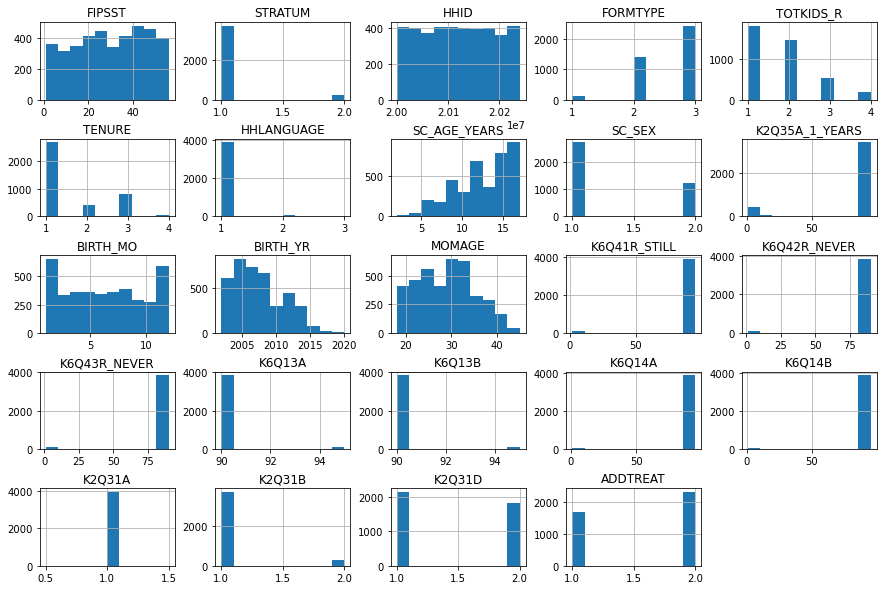

In [59]:
tot.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

In [60]:
tot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3965 entries, 7 to 42776
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   FIPSST          3965 non-null   int64
 1   STRATUM         3965 non-null   int64
 2   HHID            3965 non-null   int64
 3   FORMTYPE        3965 non-null   int64
 4   TOTKIDS_R       3965 non-null   int64
 5   TENURE          3965 non-null   int64
 6   HHLANGUAGE      3965 non-null   int64
 7   SC_AGE_YEARS    3965 non-null   int64
 8   SC_SEX          3965 non-null   int64
 9   K2Q35A_1_YEARS  3965 non-null   int64
 10  BIRTH_MO        3965 non-null   int64
 11  BIRTH_YR        3965 non-null   int64
 12  MOMAGE          3965 non-null   int64
 13  K6Q41R_STILL    3965 non-null   int64
 14  K6Q42R_NEVER    3965 non-null   int64
 15  K6Q43R_NEVER    3965 non-null   int64
 16  K6Q13A          3965 non-null   int64
 17  K6Q13B          3965 non-null   int64
 18  K6Q14A          3965 non-nu

In [61]:
from sklearn.linear_model import LogisticRegression

In [62]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [63]:
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve

In [64]:
x_variables= tot[['FIPSST', 'STRATUM', 'TOTKIDS_R', 'TENURE','HHLANGUAGE', 'SC_AGE_YEARS', 'SC_SEX', 'K2Q35A_1_YEARS', 'SC_SEX', 'K2Q35A_1_YEARS','BIRTH_MO', 'BIRTH_YR', 'MOMAGE', 'K6Q41R_STILL', 'K6Q42R_NEVER', 'K6Q43R_NEVER', 'K6Q13A','K6Q13B', 'K6Q14A', 'K6Q14B']]
y_variables= tot['K2Q31B']

In [65]:
X_train, X_test, y_train, y_test= train_test_split(x_variables, y_variables, test_size=0.20, random_state=27)

In [66]:
print(y_train)

28854    1
26332    1
26008    1
13069    1
809      2
        ..
42042    1
27380    1
42210    1
40734    1
11083    1
Name: K2Q31B, Length: 3172, dtype: int64


In [67]:
print(X_train)

       FIPSST  STRATUM  TOTKIDS_R  TENURE  HHLANGUAGE  SC_AGE_YEARS  SC_SEX  \
28854      28        2          2       3           1             9       2   
26332       8        1          2       3           1            11       1   
26008      41        1          2       1           1            12       2   
13069      45        1          3       1           1            12       2   
809        35        1          2       1           1            13       1   
...       ...      ...        ...     ...         ...           ...     ...   
42042      21        1          4       2           1            11       1   
27380      51        1          1       1           1            17       1   
42210       9        1          2       1           1             7       1   
40734      49        1          1       2           1            17       1   
11083       5        1          1       1           1            15       2   

       K2Q35A_1_YEARS  SC_SEX  K2Q35A_1_YEARS  BIRT

In [68]:
logreg_clf = LogisticRegression()

In [69]:
logreg_clf.fit(X_train,y_train)

/Users/maryamnozari/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [70]:
from sklearn import preprocessing

In [71]:
scaler = preprocessing.StandardScaler().fit(X_train)

In [72]:
X_scaled = scaler.transform(X_train)

In [73]:
logreg_clf.fit(X_scaled,y_train)

LogisticRegression()

In [74]:
x_variables.corr()

,FIPSST,STRATUM,TOTKIDS_R,TENURE,HHLANGUAGE,SC_AGE_YEARS,SC_SEX,K2Q35A_1_YEARS,SC_SEX,K2Q35A_1_YEARS,BIRTH_MO,BIRTH_YR,MOMAGE,K6Q41R_STILL,K6Q42R_NEVER,K6Q43R_NEVER,K6Q13A,K6Q13B,K6Q14A,K6Q14B
FIPSST,1.000000,-0.027317,-0.005411,0.008142,0.016729,-0.000766,-0.009269,0.008756,-0.009269,0.008756,-0.027006,0.000487,-0.010462,-0.005613,-0.003855,-0.003895,0.003862,0.003862,-0.018561,-0.018619
STRATUM,-0.027317,1.000000,-0.039291,0.120998,0.012344,-0.036290,0.020969,0.008592,0.020969,0.008592,0.012557,0.036139,-0.040898,-0.003191,-0.040108,-0.040288,0.040208,0.040208,-0.014200,-0.014318
TOTKIDS_R,-0.005411,-0.039291,1.000000,0.000486,0.005596,-0.160751,-0.011869,0.024988,-0.011869,0.024988,-0.004166,0.155622,-0.221540,-0.014602,-0.003934,-0.003922,0.003914,0.003914,-0.007577,-0.007653
TENURE,0.008142,0.120998,0.000486,1.000000,0.060378,-0.076881,-0.020309,-0.027648,-0.020309,-0.027648,0.042095,0.078799,-0.170185,-0.021942,-0.041197,-0.041294,0.041260,0.041260,-0.009792,-0.009767
HHLANGUAGE,0.016729,0.012344,0.005596,0.060378,1.000000,-0.042508,-0.034190,-0.034086,-0.034190,-0.034086,0.024069,0.035948,0.022695,-0.008889,0.000941,0.000982,-0.000964,-0.000964,0.005952,0.005905
SC_AGE_YEARS,-0.000766,-0.036290,-0.160751,-0.076881,-0.042508,1.000000,0.021369,0.020285,0.021369,0.020285,0.011560,-0.950635,0.057973,0.324887,0.402690,0.402690,-0.402697,-0.402697,0.315345,0.315381
SC_SEX,-0.009269,0.020969,-0.011869,-0.020309,-0.034190,0.021369,1.000000,0.105105,1.000000,0.105105,-0.013769,-0.020747,-0.005911,0.024704,0.005697,0.005629,-0.005627,-0.005627,-0.003344,-0.003218
K2Q35A_1_YEARS,0.008756,0.008592,0.024988,-0.027648,-0.034086,0.020285,0.105105,1.000000,0.105105,1.000000,-0.032864,-0.019361,-0.022960,0.029448,0.042512,0.042706,-0.042678,-0.042678,0.053199,0.053038
SC_SEX,-0.009269,0.020969,-0.011869,-0.020309,-0.034190,0.021369,1.000000,0.105105,1.000000,0.105105,-0.013769,-0.020747,-0.005911,0.024704,0.005697,0.005629,-0.005627,-0.005627,-0.003344,-0.003218
K2Q35A_1_YEARS,0.008756,0.008592,0.024988,-0.027648,-0.034086,0.020285,0.105105,1.000000,0.105105,1.000000,-0.032864,-0.019361,-0.022960,0.029448,0.042512,0.042706,-0.042678,-0.042678,0.053199,0.053038


<AxesSubplot:>

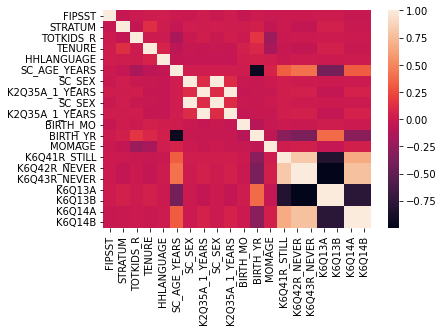

In [75]:
sns.heatmap(x_variables.corr())

In [76]:
corr_matrix = x_variables.corr().abs()

In [77]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

/var/folders/q1/5l3sndps6dj6yrp14kddr27w0000gn/T/ipykernel_3465/2665302050.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [78]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [79]:
to_drop

['SC_SEX',
 'K2Q35A_1_YEARS',
 'SC_SEX',
 'K2Q35A_1_YEARS',
 'BIRTH_YR',
 'K6Q43R_NEVER',
 'K6Q13A',
 'K6Q13B',
 'K6Q14B']

In [80]:
x_variables.drop(to_drop, axis=1, inplace=True)

/var/folders/q1/5l3sndps6dj6yrp14kddr27w0000gn/T/ipykernel_3465/3638725736.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_variables.drop(to_drop, axis=1, inplace=True)


In [81]:
x_variables.corr()

,FIPSST,STRATUM,TOTKIDS_R,TENURE,HHLANGUAGE,SC_AGE_YEARS,BIRTH_MO,MOMAGE,K6Q41R_STILL,K6Q42R_NEVER,K6Q14A
FIPSST,1.000000,-0.027317,-0.005411,0.008142,0.016729,-0.000766,-0.027006,-0.010462,-0.005613,-0.003855,-0.018561
STRATUM,-0.027317,1.000000,-0.039291,0.120998,0.012344,-0.036290,0.012557,-0.040898,-0.003191,-0.040108,-0.014200
TOTKIDS_R,-0.005411,-0.039291,1.000000,0.000486,0.005596,-0.160751,-0.004166,-0.221540,-0.014602,-0.003934,-0.007577
TENURE,0.008142,0.120998,0.000486,1.000000,0.060378,-0.076881,0.042095,-0.170185,-0.021942,-0.041197,-0.009792
HHLANGUAGE,0.016729,0.012344,0.005596,0.060378,1.000000,-0.042508,0.024069,0.022695,-0.008889,0.000941,0.005952
SC_AGE_YEARS,-0.000766,-0.036290,-0.160751,-0.076881,-0.042508,1.000000,0.011560,0.057973,0.324887,0.402690,0.315345
BIRTH_MO,-0.027006,0.012557,-0.004166,0.042095,0.024069,0.011560,1.000000,-0.020975,-0.006737,-0.014966,-0.004041
MOMAGE,-0.010462,-0.040898,-0.221540,-0.170185,0.022695,0.057973,-0.020975,1.000000,0.014551,0.038467,0.038869
K6Q41R_STILL,-0.005613,-0.003191,-0.014602,-0.021942,-0.008889,0.324887,-0.006737,0.014551,1.000000,0.815299,0.665585
K6Q42R_NEVER,-0.003855,-0.040108,-0.003934,-0.041197,0.000941,0.402690,-0.014966,0.038467,0.815299,1.000000,0.778246


<AxesSubplot:>

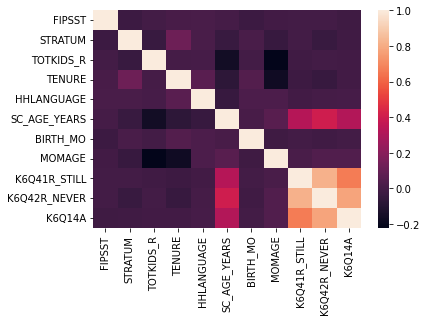

In [82]:
sns.heatmap(x_variables.corr())

In [83]:
X_train, X_test, y_train, y_test= train_test_split(x_variables, y_variables, test_size=0.20, random_state=27)

In [84]:
logreg_clf = LogisticRegression(max_iter=10000)

In [85]:
logreg_clf.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [86]:
pred=logreg_clf.predict(X_test)

In [87]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [88]:
print(accuracy_score(pred, y_test))

0.9369482976040353


In [89]:
print(confusion_matrix(pred, y_test))

[[743  50]
 [  0   0]]


In [90]:
y_variables.value_counts()

1    3673
2     292
Name: K2Q31B, dtype: int64

(array([743.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  50.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <BarContainer object of 10 artists>)

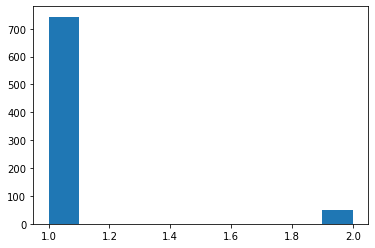

In [91]:
plt.hist(y_test)

<AxesSubplot:>

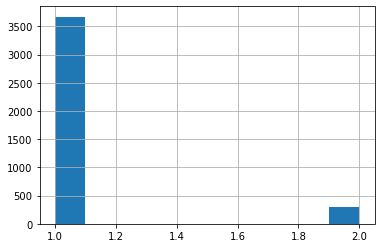

In [92]:
y_variables.hist()

In [94]:
!pip install imblearn
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

     |████████████████████████████████| 226 kB 4.3 MB/s eta 0:00:01
     |████████████████████████████████| 297 kB 32.5 MB/s eta 0:00:01
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [95]:
# Define SMOTE-Tomek Links
resample=SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
X, y = resample.fit_resample(x_variables, y_variables)

(array([3588.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        3673.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <BarContainer object of 10 artists>)

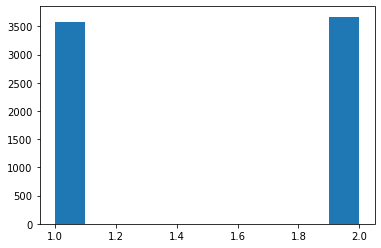

In [97]:
plt.hist(y)

In [98]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.20, random_state=27)

In [99]:
logreg_clf = LogisticRegression(max_iter=10000)

In [100]:
logreg_clf.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [101]:
pred=logreg_clf.predict(X_test)

In [102]:
print(accuracy_score(pred, y_test))

0.6558843771507227


In [103]:
print(confusion_matrix(pred, y_test))

[[419 197]
 [303 534]]


In [104]:
KNN_model = KNeighborsClassifier(n_neighbors=5)

In [105]:
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [106]:
pred=KNN_model.predict(X_test)

In [107]:
print(accuracy_score(pred, y_test))

0.8348245010323468


In [108]:
print(confusion_matrix(pred, y_test))

[[489   7]
 [233 724]]


In [110]:
from sklearn.svm import SVC

In [113]:
SVC_model =SVC()

In [114]:
SVC_model.fit(X_train,y_train)

SVC()

In [116]:
pred=SVC_model.predict(X_test)

In [117]:
print(accuracy_score(pred, y_test))

0.6331727460426704


In [118]:
print(confusion_matrix(pred, y_test))

[[331 142]
 [391 589]]


In [119]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [127]:
clf = RandomForestClassifier(max_depth=15, random_state=0)
clf.fit(X, y)
pred=clf.predict(X_test)
print(accuracy_score(pred, y_test))
print(confusion_matrix(pred, y_test))

0.9291121816930489
[[622   3]
 [100 728]]


In [128]:
tot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3965 entries, 7 to 42776
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   FIPSST          3965 non-null   int64
 1   STRATUM         3965 non-null   int64
 2   HHID            3965 non-null   int64
 3   FORMTYPE        3965 non-null   int64
 4   TOTKIDS_R       3965 non-null   int64
 5   TENURE          3965 non-null   int64
 6   HHLANGUAGE      3965 non-null   int64
 7   SC_AGE_YEARS    3965 non-null   int64
 8   SC_SEX          3965 non-null   int64
 9   K2Q35A_1_YEARS  3965 non-null   int64
 10  BIRTH_MO        3965 non-null   int64
 11  BIRTH_YR        3965 non-null   int64
 12  MOMAGE          3965 non-null   int64
 13  K6Q41R_STILL    3965 non-null   int64
 14  K6Q42R_NEVER    3965 non-null   int64
 15  K6Q43R_NEVER    3965 non-null   int64
 16  K6Q13A          3965 non-null   int64
 17  K6Q13B          3965 non-null   int64
 18  K6Q14A          3965 non-nu

Data Story Telling

The NSCH is a national survey, funded and directed by the Health Resources and Services Administration’s Maternal and Child Health Bureau (HRSA MCHB) that provides rich data on multiple, intersecting aspects of children’s health and well-being – including physical and mental health, access to and quality of health care, and the child’s family, neighborhood, school, and social context.

The NSCH is designed to produce national and state-level data on the physical and emotional health of children 0 - 17 years old in the United States.

In [129]:
tot['SC_AGE_YEARS']

7         9
21       13
42        9
59        8
90       10
         ..
42749    16
42762     9
42772    13
42774    14
42776    15
Name: SC_AGE_YEARS, Length: 3965, dtype: int64